# Análises Descritivas de Acidentes Rodoviários

---

## 1. Distribuição Temporal
- **Por Ano:** Quantidade total de acidentes registrados anualmente.
- **Por Mês:** Variação mensal dos acidentes.
- **Por Horário:** Distribuição ao longo das 24h (picos matutinos, vespertinos, noturnos).

---

## 2. Distribuição Espacial
- **Por Rodovia/Trecho:** Identificação dos pontos mais críticos.
- **Ranking das Rodovias:** Ordenação das rodovias com maior número de ocorrências.

---

## 3. Perfil dos Veículos Envolvidos
- **Automóveis**
- **Caminhões**
- **Motocicletas**
- **Ônibus**
- Frequência relativa (%) de cada tipo de veículo.

---

## 4. Gravidade dos Acidentes
- **Taxa de Mortos**
- **Taxa de Feridos**
- **Taxa de Ilesos**

---


## 6. Considerações Finais
- Identificação de padrões temporais e espaciais.
- Relação entre perfil dos veículos e gravidade.
- Sugestões de políticas públicas e medidas preventivas.


In [136]:
import pandas as pd

In [137]:
import pandas as pd
import os

file_path = (r'C:\Users\Pedro Soares\Desktop\portfolio\aguiabranca\data\data\acidentes_mg.csv')

if os.path.exists(file_path):
    try:
        df = pd.read_csv(file_path, sep=';', encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, sep=';', encoding='cp1252')

1. Distribuição Temporal
- **Por Ano:** Quantidade total de acidentes registrados anualmente.

In [138]:
### se quiser mudar o ano, é só trocar o 2022 abaixo após o '=='

df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y', errors='coerce')
total_registros_2022 = len(df[df['data'].dt.year == 2022])
print(total_registros_2022)


301


1. Distribuição Temporal
- **Por Mês:** Variação mensal dos acidentes.

! ATENTION !
  - Nesta análise descritiva vamos trabalhar apenas com o mês de setembro para não ficar desordenada.

In [139]:
### se quiser mudar o mês, é só trocar o número do mês abaixo após o '=='

df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y', errors='coerce')
total_registros_2022 = len(df[df['data'].dt.month == 9])
print(total_registros_2022)

1253


- **Por Horário:** Distribuição ao longo das 24h (picos matutinos, vespertinos, noturnos).


In [140]:
from datetime import time

df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S', errors='coerce').dt.time
inicio = time(7, 0, 0)   # 07:00:00
fim    = time(12, 0, 0) 

df_setembro = df[df['data'].dt.month == 9]
df_setembro_manha = df_setembro[
    (df_setembro['horario'] >= inicio) & 
    (df_setembro['horario'] <= fim)
]

horarios = df['horario'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S', errors='coerce'))
total = len(df_setembro_manha)
print(f"Total de acidentes em setembro entre 07h e 12h: {total}")

Total de acidentes em setembro entre 07h e 12h: 285


In [141]:
total_por_ano = df.groupby(df['data'].dt.year)['levemente_feridos'].sum()
print(total_por_ano[2022])

94


- **Por Rodovia/Trecho:** Identificação dos pontos mais críticos.


In [142]:
# Contagem de acidentes por rodovia/trecho
criticos = df_setembro['trecho'].value_counts()

print(criticos.head(10))  # Top 10 trechos com mais acidentes
# Percentual de acidentes por trecho
criticos_rel = df_setembro['trecho'].value_counts(normalize=True) * 100

print(criticos_rel.head(10))
criticos = df_setembro.groupby(['trecho','km']).size().reset_index(name='total_acidentes')

# Ordenar pelos mais críticos
criticos = criticos.sort_values(by='total_acidentes', ascending=False)

print(criticos.head(10))

top10 = criticos.head(10)

trecho
BR-116/RJ    541
BR-116/MG    421
BR-493/RJ    183
BR-465/RJ     90
Trecho 01      7
Trecho 03      6
Trecho 02      5
Name: count, dtype: int64
trecho
BR-116/RJ    43.176377
BR-116/MG    33.599362
BR-493/RJ    14.604948
BR-465/RJ     7.182761
Trecho 01     0.558659
Trecho 03     0.478851
Trecho 02     0.399042
Name: proportion, dtype: float64
        trecho       km  total_acidentes
511  BR-116/RJ  148,000                7
874  BR-493/RJ   19,000                7
485  BR-116/RJ  142,000                6
459  BR-116/RJ  137,000                6
413  BR-116/RJ  118,000                6
476  BR-116/RJ  141,000                6
534  BR-116/RJ  173,000                6
584  BR-116/RJ  184,000                5
506  BR-116/RJ  147,000                5
505  BR-116/RJ      147                5


In [143]:
# Somar cada tipo de veículo envolvido (apenas setembro)
soma_veiculos = {
    'Automóveis': df_setembro['automovel'].sum(),
    'Caminhões': df_setembro['caminhao'].sum(),
    'Motocicletas': df_setembro['moto'].sum(),
    'Ônibus': df_setembro['onibus'].sum()
}

print(soma_veiculos)


{'Automóveis': 1089, 'Caminhões': 208, 'Motocicletas': 487, 'Ônibus': 37}


Automóveis tendem a aparecer em maior proporção → refletem o volume da frota.

Caminhões podem ter menor frequência, mas maior gravidade → acidentes mais fatais.

Motocicletas geralmente aparecem com alta proporção em acidentes urbanos → vulnerabilidade do condutor.

Ônibus aparecem pouco, mas quando envolvidos podem gerar múltiplas vítimas.

4. Gravidade dos Acidentes
- **Taxa de Mortos**
- **Taxa de Feridos**
- **Taxa de Ilesos**

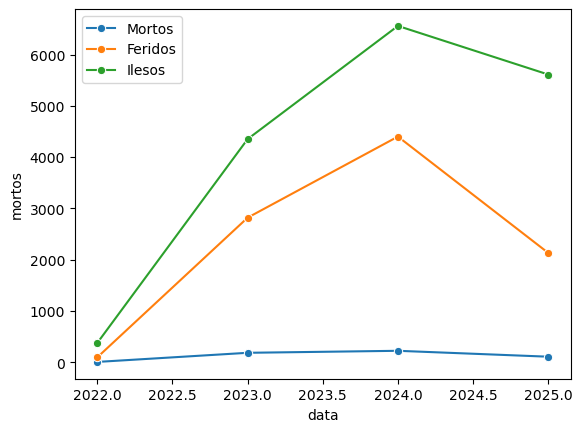

In [144]:
total_mortos = df.groupby(df['data'].dt.year)['mortos'].sum()
total_ilesos = df.groupby(df['data'].dt.year)['ilesos'].sum()
total_feridos = df.groupby(df['data'].dt.year)['levemente_feridos'].sum()

import seaborn as sns
plot = sns.lineplot(data=total_mortos, label='Mortos', marker='o')
plot = sns.lineplot(data=total_feridos, label='Feridos', marker='o')
plot = sns.lineplot(data=total_ilesos, label='Ilesos', marker   ='o')

### Definindo preparação pra Machine Learning

In [145]:

def classifica_gravidade(row):
    if row['mortos'] > 0 or row['gravemente_feridos'] > 0:
        return 'Grave'
    elif row['moderadamente_feridos'] > 0:
        return 'Moderado'
    elif row['levemente_feridos'] > 0:
        return 'Leve'
    else:
        return 'Ileso'

df_setembro['gravidade'] = df_setembro.apply(classifica_gravidade, axis=1)


C:\Users\Pedro Soares\AppData\Local\Temp\ipykernel_6896\4289063209.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_setembro['gravidade'] = df_setembro.apply(classifica_gravidade, axis=1)


In [146]:
print(df_setembro['gravidade'].value_counts(normalize=True) * 100)


gravidade
Ileso       40.143655
Leve        34.716680
Moderado    17.079010
Grave        8.060654
Name: proportion, dtype: float64


In [147]:
from sklearn.model_selection import train_test_split

X = df_setembro[['automovel','caminhao','moto','onibus','outros','sentido','tipo_de_acidente','horario','trecho']]
y = df_setembro['gravidade']

# Transformar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC()
}

from sklearn.metrics import accuracy_score, precision_score, recall_score

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    resultados[nome] = {
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted')
    }

import pandas as pd
quadro_comparativo = pd.DataFrame(resultados).T
print(quadro_comparativo)



                     Acurácia  Precisão    Recall
Logistic Regression  0.529255  0.495596  0.529255
Random Forest        0.526596  0.492677  0.526596
KNN                  0.452128  0.428068  0.452128
SVM                  0.521277  0.457656  0.521277
